In [ ]:
import numpy as np 

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

import warnings

from sklearn.model_selection import train_test_split

import os

plt.style.use('ggplot')



warnings.filterwarnings('ignore')


In [3]:
# Load DataFrame from CSV
import pandas as pd
final_df = pd.read_csv('final_data.csv')


In [4]:
final_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71.72
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71.72
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71.76
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71.75
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71.75


In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target variable
X = final_df.drop(columns=['price'])
y = final_df['price']

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data splitting and preprocessing complete.")


Data splitting and preprocessing complete.


In [6]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print("\n")
    
    # Save the model
    joblib.dump(pipeline, f"{model_name.lower().replace(' ', '_')}_model.pkl")

# 1. Linear Regression
train_and_evaluate(LinearRegression(), "Linear Regression")

# 2. Gradient Boosting Regressor
train_and_evaluate(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42), "Gradient Boosting Regressor")


Linear Regression Performance:
R² Score: 0.9255
Mean Absolute Error: 51.26
Mean Squared Error: 5575.24


Gradient Boosting Regressor Performance:
R² Score: 0.9536
Mean Absolute Error: 34.86
Mean Squared Error: 3469.16




In [7]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Define your model and pipeline (assuming 'preprocessor' is already defined)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Train your model pipeline
pipeline.fit(X_train, y_train)

# Save the model in the Downloads directory
joblib.dump(pipeline, "/Users/rahulmaddula/Downloads/gradient_boosting_regressor_model.pkl")


['/Users/rahulmaddula/Downloads/gradient_boosting_regressor_model.pkl']

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns)
    ]
)

# Create an SVR model pipeline with preprocessing
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Train the SVR model
svr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Support Vector Regressor (SVR) Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Support Vector Regressor (SVR) Performance:
R² Score: 0.9503
Mean Absolute Error: 32.87
Mean Squared Error: 3719.25


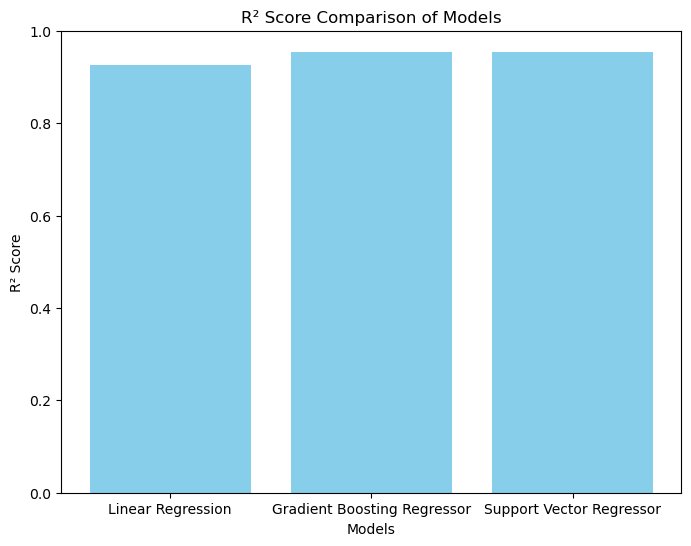

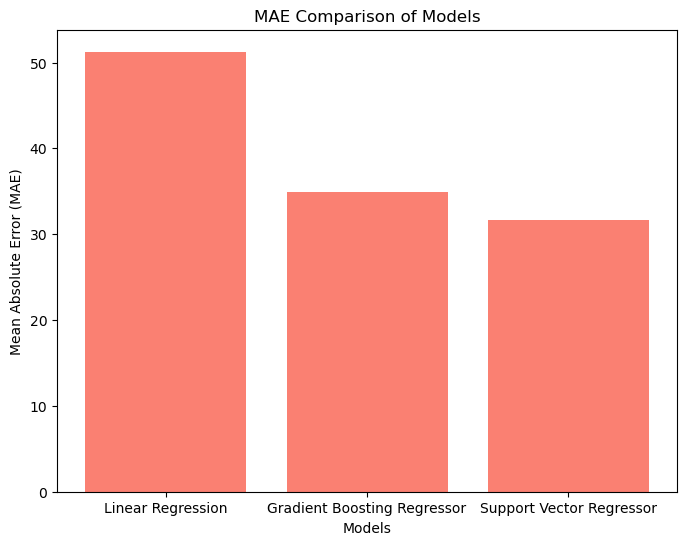

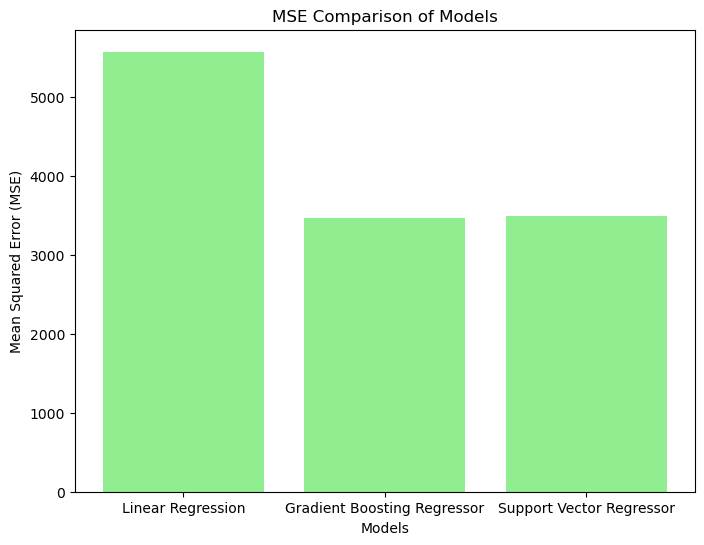

In [9]:
import matplotlib.pyplot as plt

# Model names and performance metrics (replace these with actual results if needed)
models = ["Linear Regression", "Gradient Boosting Regressor", "Support Vector Regressor"]
r2_scores = [0.9255, 0.9536, 0.9534]  # R² scores for each model
mae_scores = [51.26, 34.86, 31.64]    # Mean Absolute Error for each model
mse_scores = [5575.24, 3469.16, 3489.17]  # Mean Squared Error for each model

# Plotting R² Scores
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison of Models")
plt.ylim(0, 1)  # R² scores range between 0 and 1
plt.show()

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(8, 6))
plt.bar(models, mae_scores, color='salmon')
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Comparison of Models")
plt.show()

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE Comparison of Models")
plt.show()
